In [64]:
# Import libraries and init Matplotlib for inline graphs
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import myvariant as mv
import numpy as np

In [35]:
data = pd.read_excel("../data/ALL_1_SUPER.xlsx")

# Investigate Dataset

we first need to check whats happening in our dataset.

In [36]:
data

,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R
0,19,40843438,rs72549453,19,40843446,rs146895354,-0.003091
1,19,40843438,rs72549453,19,40843552,rs569152950,-0.002185
2,19,40843438,rs72549453,19,40843567,rs192752442,-0.004890
3,19,40843438,rs72549453,19,40843603,rs558177610,-0.002185
4,19,40843438,rs72549453,19,40843612,rs113777046,NaN
...,...,...,...,...,...,...,...
3514,19,40850474,rs28399433,19,40850520,rs547290288,-0.010570
3515,19,40850474,rs28399433,19,40850537,rs183167151,-0.014952
3516,19,40850518,rs528755675,19,40850520,rs547290288,-0.000426
3517,19,40850518,rs528755675,19,40850537,rs183167151,-0.000603


In [41]:
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 3518
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CHR_A   2854 non-null   int64  
 1   BP_A    2854 non-null   int64  
 2   SNP_A   2854 non-null   object 
 3   CHR_B   2854 non-null   int64  
 4   BP_B    2854 non-null   int64  
 5   SNP_B   2854 non-null   object 
 6   R       2854 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 178.4+ KB


2854

# Removing Null Values:

Ok, so nextup we need to strip out all of the NULL values associated with a linkage-disequilibrium analysis.

In [40]:
data.dropna(inplace=True)

In [42]:
data.info()
len(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 3518
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CHR_A   2854 non-null   int64  
 1   BP_A    2854 non-null   int64  
 2   SNP_A   2854 non-null   object 
 3   CHR_B   2854 non-null   int64  
 4   BP_B    2854 non-null   int64  
 5   SNP_B   2854 non-null   object 
 6   R       2854 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 178.4+ KB


2854

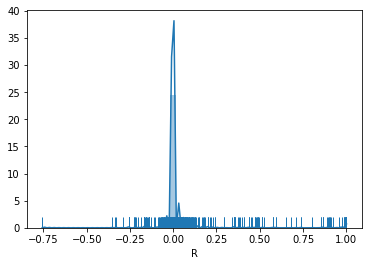

In [43]:
sns.distplot(data["R"], rug=True)

# Make a heatmap:

Ok, so our data is looking good. Its all in the right types and we've filtered out the NULL values. Now lets plot it and see what we get. First off though, we have to slice up and re-format our data into numbers or it will break.

In [60]:
heatMapData = data[["SNP_A", "SNP_B", "R"]]
heatMapData.loc[:, "SNP_A"] #= pd.to_numeric(heatMapData.loc[:, "SNP_A"])
heatMapData.loc[:, "SNP_B"] #= pd.to_numeric(heatMapData.loc[:, "SNP_B"])
heatMapData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2854 entries, 0 to 3518
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SNP_A   2854 non-null   object 
 1   SNP_B   2854 non-null   object 
 2   R       2854 non-null   float64
dtypes: float64(1), object(2)
memory usage: 89.2+ KB


In [110]:

from matplotlib.colors import LogNorm
sns.set(style="white")
#f, ax = plt.subplots(figsize=(20, 25))
HeatMapData = pd.pivot_table(data, values="R", index=["SNP_A"], columns="SNP_B")
HeatMapData
#mask = np.triu(np.ones_like(HeatMapData, dtype=np.bool))
#cmap = sns.diverging_palette(220, 10, as_cmap=True, center="dark")
#heatMap = sns.heatmap(HeatMapData, mask=mask, cmap=cmap, square=True, 
#                      cbar_kws={"shrink": .5}, vmin=data["R"].min(), vmax=data["R"].max())


SNP_B,19_41349573,19_41349912,19_41350611,19_41350841,19_41352373,19_41352497,19_41352845,19_41353623,19_41354126,19_41354417,...,rs75047183,rs79584535,rs8192720,rs8192722,rs8192723,rs8192725,rs8192726,rs8192728,rs8192729,rs8192733
SNP_A,,,,,,,,,,,,,,,,,,,,,
19_41349573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19_41349906,NaN,0.353553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19_41350611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19_41352226,NaN,NaN,NaN,NaN,-0.258199,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19_41352373,NaN,NaN,NaN,NaN,NaN,-0.166667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rs8192725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs8192726,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rs8192728,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
data.loc[data["SNP_A"] == "19_41349573", :]


,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R
86,19,40843668,19_41349573,19,40843735,rs7248240,-0.166667
89,19,40843668,19_41349573,19,40843841,rs72549450,-0.166667


In [119]:
data.loc[data["SNP_B"] == "19_41349573", :]

,CHR_A,BP_A,SNP_A,CHR_B,BP_B,SNP_B,R
48,19,40843612,rs113777046,19,40843668,19_41349573,0.471405
56,19,40843614,rs112026263,19,40843668,19_41349573,0.471405
72,19,40843645,rs8192733,19,40843668,19_41349573,0.353553
